<p align="center">
  <span style="font-size:18px"><b>ISEL - DEI</b></span><br><br>
  <span style="font-size:22px"><b>Processamento de Sinais Multimédia</b></span><br><br>
  <span style="font-size:18px"><b>1º Trabalho Prático</b></span><br>
  <span style="font-size:16px">3º Semestre 2025/2026</span><br><br>
  <span style="font-size:16px">Docente: Prof. Tiago Gonçalves</span><br>
  <span style="font-size:16px">Data: Outobro</span><br><br>
  <span style="font-size:16px">Trabalho realizado por:</span><br>
  <span style="font-size:16px">David Santos nº51417</span><br>
  <span style="font-size:16px">Bernardo Aguiar nº52483</span><br>
  <span style="font-size:16px">Diogo Costa nº52453</span><br>
</p>

##### a) Implemente os Comb-filters na sua estrutura Feadback Comb-Filter FBCF(α, Dc) = (z^(−Dc))/(1−αz−Dc), onde α está associado ao ganho e Dc ao atraso introduzido (em nº de amostras).

i) Determine e mostre a resposta em frequência (amplitude e fase). Apresente o Diagrama-Polos-Zeros. Nota: Resolva para conjunto de ganhos separadamente.


--- Feedback Comb-Filter (FBCF) ---
Parâmetros: Ganho (alpha)=0.7, Atraso (Dc)=2000 amostras (aprox. 45.35 ms)

Coeficientes do Numerador B (primeiros 5 e último):
[0. 0. 0. 0. 0.] ... [1.]

Coeficientes do Denominador A (primeiros 5 e último):
[1. 0. 0. 0. 0.] ... [-0.7]


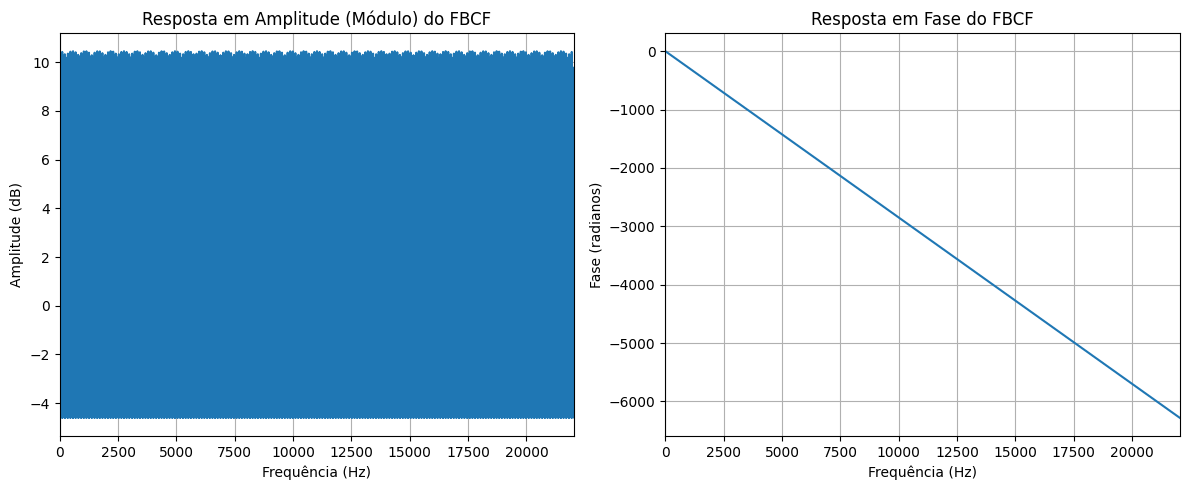

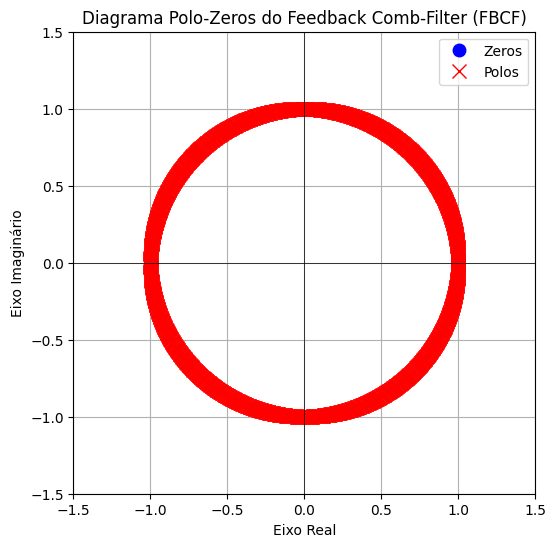

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

np.set_printoptions(suppress=True)

def zplane(b, a, filename=None):
    z = np.roots(b)
    p = np.roots(a)
    
    plt.figure(figsize=(6, 6))
    
    unit_circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
    plt.gca().add_patch(unit_circle)
    
    plt.plot(np.real(z), np.imag(z), 'o', markersize=9, color='blue', label='Zeros')
    plt.plot(np.real(p), np.imag(p), 'x', markersize=10, color='red', label='Polos')
    
    plt.title('Diagrama Polo-Zeros do Feedback Comb-Filter (FBCF)')
    plt.xlabel('Eixo Real')
    plt.ylabel('Eixo Imaginário')
    plt.xlim([-1.5, 1.5])
    plt.ylim([-1.5, 1.5])
    plt.grid(True)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.legend()
    plt.gca().set_aspect('equal', adjustable='box') 
    
    if filename:
        plt.savefig(filename)

Fs = 44100        
alpha = 0.7       
Dc = 2000         

print(f"--- Feedback Comb-Filter (FBCF) ---")
print(f"Parâmetros: Ganho (alpha)={alpha}, Atraso (Dc)={Dc} amostras (aprox. {Dc/Fs*1000:.2f} ms)")

B = np.zeros(Dc + 1)
B[Dc] = 1

A = np.zeros(Dc + 1)
A[0] = 1
A[Dc] = -alpha

print("\nCoeficientes do Numerador B (primeiros 5 e último):")
print(B[:5], "...", B[-1:])
print("\nCoeficientes do Denominador A (primeiros 5 e último):")
print(A[:5], "...", A[-1:])

w, H = signal.freqz(B, A, worN=8192) 
f = w * Fs / (2*np.pi)               

amplitude_db = 20 * np.log10(np.abs(H))

fase = np.unwrap(np.angle(H)) 

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(f, amplitude_db)
plt.title('Resposta em Amplitude (Módulo) do FBCF')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitude (dB)')
plt.grid(True)
plt.xlim(0, Fs/2)

plt.subplot(1, 2, 2)
plt.plot(f, fase)
plt.title('Resposta em Fase do FBCF')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Fase (radianos)')
plt.grid(True)
plt.xlim(0, Fs/2)
plt.tight_layout()

zplane(B, A, filename='zplane_fbcf.png')

plt.show()

ii) Determine experimentalmente a resposta impulsional. Ilustre graficamente, guarde num ficheiro wave e escute o resultado.

In [2]:
import numpy as np
from scipy import signal
from scipy.io import wavfile

Fs = 44100        
alpha = 0.7       
Dc = 2000         
NOME_FICHEIRO_OUTPUT = 'fbcf_audio_processado.wav'

B = np.zeros(Dc + 1)
B[Dc] = 1

A = np.zeros(Dc + 1)
A[0] = 1
A[Dc] = -alpha

DURACAO_SEG = 2 
FREQUENCIA_HZ = 440 
AMPLITUDE = 0.8
FADE_TIME = 0.05 

NUM_AMOSTRAS = int(Fs * DURACAO_SEG)
tempo = np.arange(NUM_AMOSTRAS) / Fs

sinal_teste = AMPLITUDE * np.sin(2 * np.pi * FREQUENCIA_HZ * tempo)

fade_samples = int(Fs * FADE_TIME)
fade_in = np.linspace(0, 1, fade_samples)
fade_out = np.linspace(1, 0, fade_samples)

sinal_teste[:fade_samples] *= fade_in
sinal_teste[-fade_samples:] *= fade_out

sinal_processado = signal.lfilter(B, A, sinal_teste)

sinal_processado_normalizado = sinal_processado / np.max(np.abs(sinal_processado))

wavfile.write(NOME_FICHEIRO_OUTPUT, Fs, sinal_processado_normalizado.astype(np.float32))

print(f"Sinal de teste (tom {FREQUENCIA_HZ} Hz) gerado e processado com o FBCF.")
print(f"Sinal guardado como: {NOME_FICHEIRO_OUTPUT}")


Sinal de teste (tom 440 Hz) gerado e processado com o FBCF.
Sinal guardado como: fbcf_audio_processado.wav
